In [11]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import  os
import pickle 
model_file = os.listdir("/home/black_tree/Documents/computer_science/capstone-ML-project/models")
model_path = []

for f in model_file:
    p = os.path.join("/home/black_tree/Documents/computer_science/capstone-ML-project/models", f)
    model_path.append(p)
knnc = None
lr = None
rfc = None
xgb = None

models = [rfc, xgb, lr, knnc]

for i in range(len(models)):
    with open(model_path[i], "rb") as f:
        models[i] = pickle.load(f)
            
    



In [13]:
rfc = models[0]
xgb = models[1]
lr = models[2]
knnc = models[3]

In [14]:
test = pd.read_csv("/home/black_tree/Documents/computer_science/capstone-ML-project/data/testing_data.csv")

In [15]:
test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetic
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,10.0,10.0,1.0,0.0,9.0,4.0,5.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,11.0,5.0,6.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,4.0,0.0,0.0,1.0,6.0,6.0,8.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,4.0,0.0,1.0,8.0,4.0,4.0,0.0


In [16]:
x_test = test.drop(["Diabetic"] , axis=1)

In [17]:
y_test = test["Diabetic"]

CHECKING THEE PERFORMANCE ON TESTING DATA

In [ ]:
# intialise the metrics 
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve

In [19]:
p_lr = lr.predict(x_test)
p_knnc = knnc.predict(x_test)
p_rfc = rfc.predict(x_test)
p_xgb = xgb.predict(x_test)

s_lr = lr.predict_proba(x_test)
s_knnc = knnc.predict_proba(x_test)
s_rfc = rfc.predict_proba(x_test)
s_xgb = xgb.predict_proba(x_test)


In [20]:
pred = [p_lr
,p_knnc
,p_rfc
,p_xgb]

probab = [s_lr,
s_knnc,
s_rfc,
s_xgb,]


In [21]:
acc = {"lr": None,
       "knnc": None, "rfc": None, "xgb": None}

recall = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
presc = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
roc = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}
cm = {"lr": None, 
       "knnc": None, "rfc": None, "xgb": None}



In [22]:
all_the_models = [lr,
knnc,
rfc,
xgb,]

In [25]:
for model in all_the_models:
    i = 0
    for key in acc:
        acc[key] = accuracy_score(y_true= y_test, y_pred= pred[i])
        i += 1

for model in all_the_models:
    i = 0
    for key in recall:
        recall[key] = recall_score(y_true= y_test, y_pred= pred[i])
        i += 1

for model in all_the_models:
    i = 0
    for key in presc:
        presc[key] = precision_score(y_true= y_test, y_pred= pred[i])
        i += 1

for model in all_the_models:
    i = 0
    for key in roc:
        roc[key] = roc_auc_score(y_true= y_test, y_score= probab[i][:, 1])
        i += 1


for model in all_the_models:
    i = 0
    for key in cm:
        cm[key] = confusion_matrix(y_true= y_test, y_pred= pred[i])
        i += 1

In [26]:
print("Accuracy:")
for k in acc:
    a = format(acc[k], ".4f")
    print(f"   # {k}: {a}")

Accuracy:
   # lr: 0.7206
   # knnc: 0.7587
   # rfc: 0.8210
   # xgb: 0.7337


In [27]:
print("Roc score")
for k in  roc:
    r = roc[k]
    print(f"  # {k}: {r:.2f}")

Roc score
  # lr: 0.81
  # knnc: 0.84
  # rfc: 0.94
  # xgb: 0.85


In [28]:
print("Recall and Precision")
for k in recall:
    rec = recall[k]
    pre = presc[k]
    print(f" # {k}: {rec:.2f} | {pre:.2f}")

Recall and Precision
 # lr: 0.75 | 0.38
 # knnc: 0.83 | 0.43
 # rfc: 0.92 | 0.52
 # xgb: 0.82 | 0.40


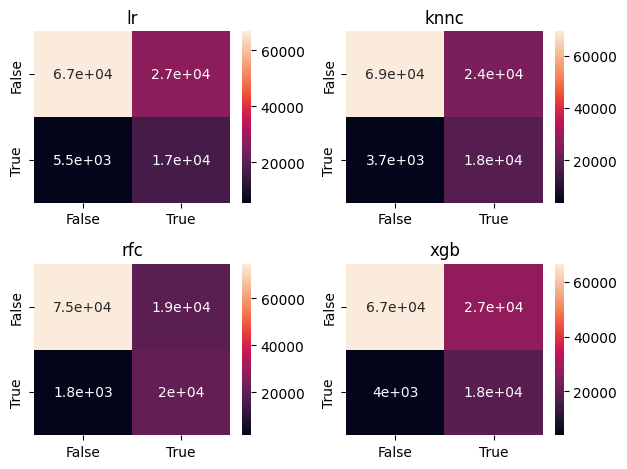

In [29]:
fig, ax = plt.subplots(nrows=2 , ncols=2)
models = ["lr", "knnc", "rfc", "xgb"]
k = 0
for i in range(2):

    for j in range(2):
        sns.heatmap(cm[models[k]], ax=ax[i][j], annot=True, 
                    xticklabels=["False", "True"], yticklabels=["False", "True"]
                    )
        ax[i][j].set_title(models[k])
        k += 1
        
plt.tight_layout()

In [31]:
models = recall.keys()
accuracy = acc.values()
recall_s = recall.values()
prescion = presc.values()
confusion_mat = cm.values()
roc_area = roc.values()
model_number = ["pass 2" for _ in range(4)]

df_metrics = pd.DataFrame({"models" : models, 
                           "accuracy" : accuracy,
                                   "recall" : recall_s, 
                                   "precision_score": prescion, 
                                   "cm": confusion_mat, 
                                   "roc" : roc_area, 
                                   "model number": model_number})


In [32]:

df_metrics["recall"] = round(df_metrics["recall"]*100, 2)
df_metrics["accuracy"] = round(df_metrics["accuracy"]*100, 2)
df_metrics["precision_score"] = round(df_metrics["precision_score"]*100, 2)
df_metrics["roc"] = round(df_metrics["roc"]*100, 2)

/tmp/ipykernel_26854/4190038815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_26854/4190038815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_26854/4190038815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_26854/4190038815.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


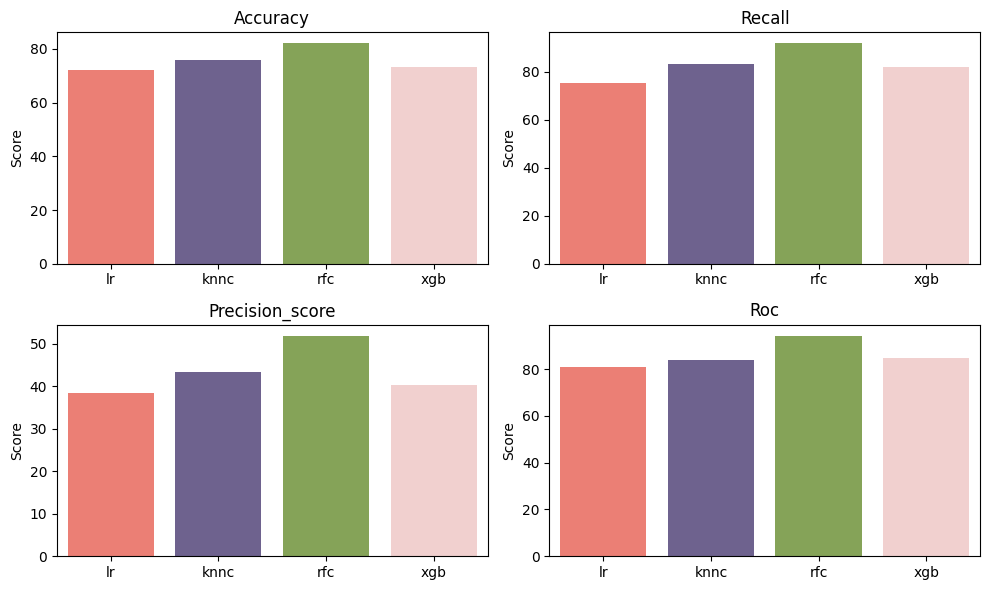

In [33]:

metrics = ["accuracy", "recall", "precision_score", "roc"]


colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9"]  

fig, ax = plt.subplots(2, 2, figsize=(10, 6))

for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    sns.barplot(
        x="models",
        y=metric,
        data=df_metrics,
        ax=ax[row][col],
        palette=colors   # apply different colors to each bar
    )
    ax[row][col].set_title(metric.capitalize())
    ax[row][col].set_ylabel("Score")
    ax[row][col].set_xlabel("")

plt.tight_layout()
plt.show();


## FINAL THOUGHTS 

The experiments explored four models — Logistic Regression, KNN, Random Forest, and XGBoost. Each contributed useful insights, with Random Forest showing the strongest overall balance, KNN and XGBoost offering competitive middle ground, and Logistic Regression serving as a simple baseline for comparison.

The results achieved here are reasonable given the setup. Since the work was carried out on a personal laptop, computational limits naturally restricted deeper hyperparameter searches and more extensive experimentation. Still, the models were able to capture meaningful patterns in the data and provide a clear sense of where performance stands.

This notebook therefore wraps up the experimentation with a practical baseline in place. With additional resources and time, the results could be pushed further, but as it stands, the models deliver a solid foundation that can inform future improvements and refinements.
